## Import Libraries

In [3]:
import torch
import numpy as np

In [4]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on GPU...')
else:
    print('CUDA is available! Training on GPU...')

CUDA is not available. Training on GPU...


---
## Load and Augment the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

In [5]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [6]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

In [8]:
# choose data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.CIFAR10('data', train=True,
                             download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [10]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

#### Visualize a Batch of Training Data

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    print(np.transpose(img, (1, 2, 0)).shape)
    plt.imshow(np.transpose(img, (1, 2, 0))) # convert from Tensor image

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


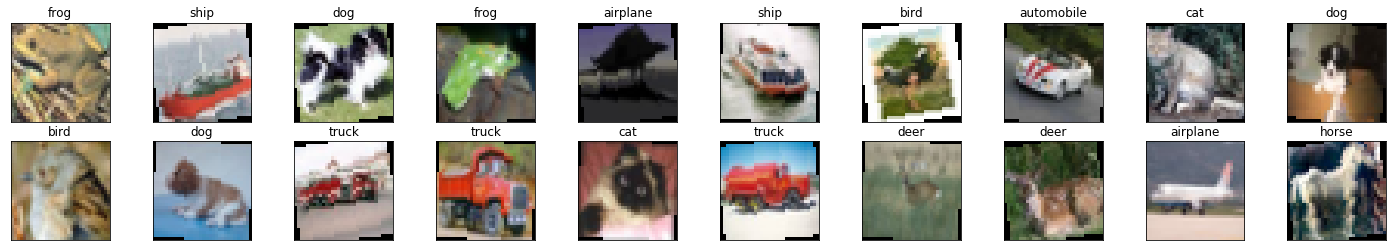

In [103]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25,4))
# display 20 images (as per one batch)
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

#### View an Image in More Detail

In [78]:
images[3]

array([[[-0.7019608 , -0.56078434, -0.5137255 , ..., -0.78039217,
         -0.75686276, -0.4588235 ],
        [-0.67058825, -0.6       , -0.5372549 , ..., -0.90588236,
         -0.84313726, -0.4823529 ],
        [-0.7176471 , -0.62352943, -0.5686275 , ..., -0.90588236,
         -0.9137255 , -0.5294118 ],
        ...,
        [-0.9137255 , -1.        , -0.9843137 , ..., -0.9137255 ,
         -0.8509804 , -0.84313726],
        [-0.8117647 , -1.        , -0.9764706 , ..., -0.9764706 ,
         -0.8666667 , -0.79607844],
        [-0.7647059 , -0.96862745, -0.96862745, ..., -0.96862745,
         -0.827451  , -0.7490196 ]],

       [[-0.49019605, -0.3490196 , -0.3098039 , ..., -0.8039216 ,
         -0.7411765 , -0.30196077],
        [-0.4823529 , -0.38823527, -0.31764704, ..., -0.90588236,
         -0.827451  , -0.34117645],
        [-0.56078434, -0.4352941 , -0.34117645, ..., -0.8901961 ,
         -0.90588236, -0.41176468],
        ...,
        [-0.90588236, -1.        , -0.9843137 , ..., -

In [82]:
x = np.array([[[0], [1], [2]]])
print(x.shape)
x

(1, 3, 1)


array([[[0],
        [1],
        [2]]])

In [83]:
np.squeeze(x).shape

(3,)

In [84]:
np.squeeze(x)

array([0, 1, 2])

In [91]:
np.squeeze(np.expand_dims(images[3], axis=0)).shape

(3, 32, 32)

In [79]:
np.squeeze(images[3])

array([[[-0.7019608 , -0.56078434, -0.5137255 , ..., -0.78039217,
         -0.75686276, -0.4588235 ],
        [-0.67058825, -0.6       , -0.5372549 , ..., -0.90588236,
         -0.84313726, -0.4823529 ],
        [-0.7176471 , -0.62352943, -0.5686275 , ..., -0.90588236,
         -0.9137255 , -0.5294118 ],
        ...,
        [-0.9137255 , -1.        , -0.9843137 , ..., -0.9137255 ,
         -0.8509804 , -0.84313726],
        [-0.8117647 , -1.        , -0.9764706 , ..., -0.9764706 ,
         -0.8666667 , -0.79607844],
        [-0.7647059 , -0.96862745, -0.96862745, ..., -0.96862745,
         -0.827451  , -0.7490196 ]],

       [[-0.49019605, -0.3490196 , -0.3098039 , ..., -0.8039216 ,
         -0.7411765 , -0.30196077],
        [-0.4823529 , -0.38823527, -0.31764704, ..., -0.90588236,
         -0.827451  , -0.34117645],
        [-0.56078434, -0.4352941 , -0.34117645, ..., -0.8901961 ,
         -0.90588236, -0.41176468],
        ...,
        [-0.90588236, -1.        , -0.9843137 , ..., -

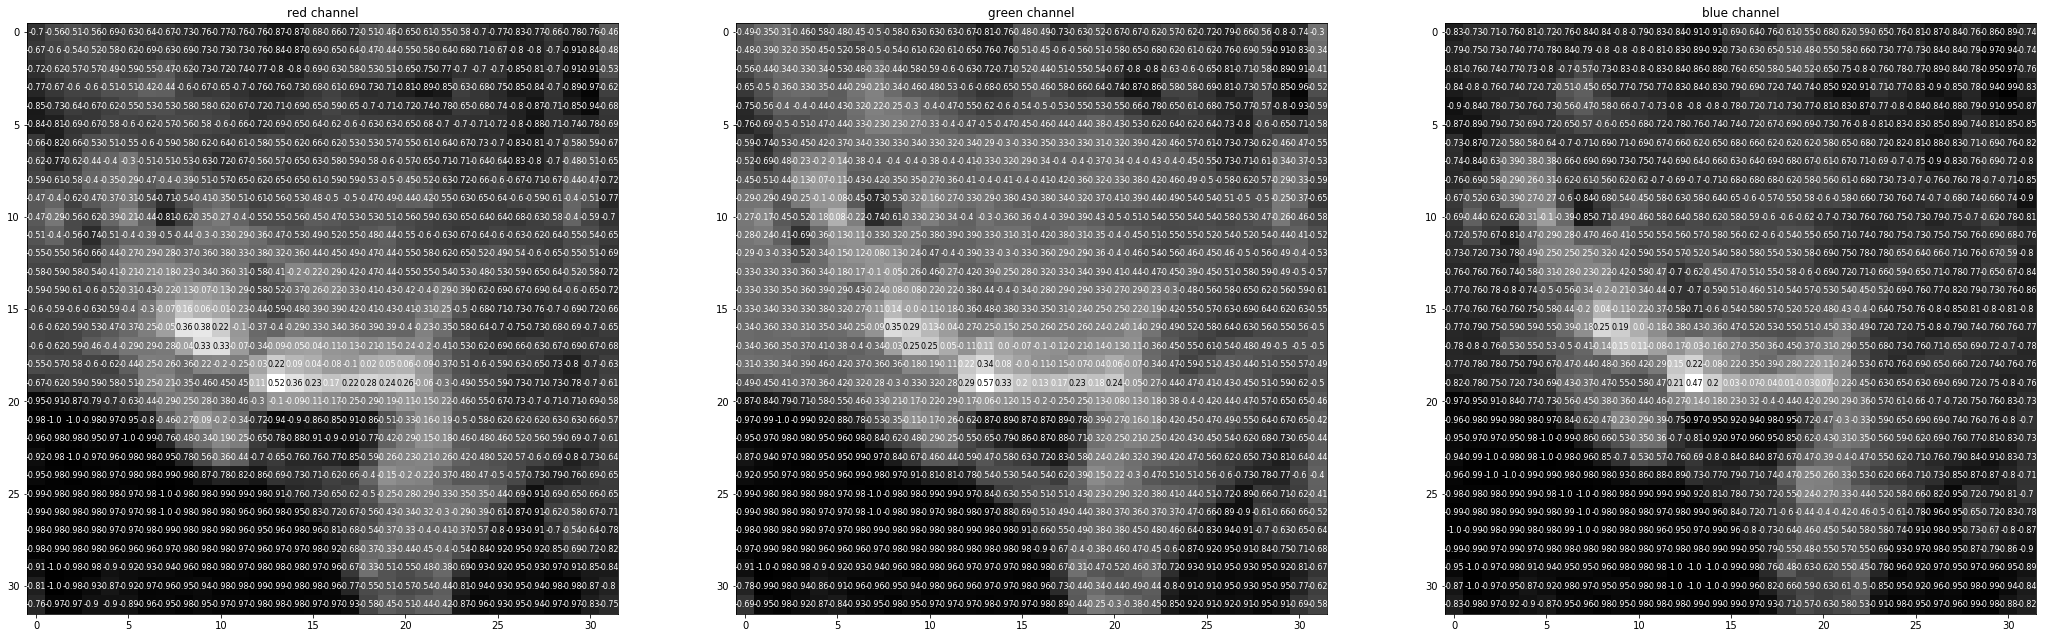

In [93]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36))
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx +1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] != 0 else 0
            ax.annotate(str(val), xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center', size=8,
                       color='white' if img[x][y]<thresh else 'black')

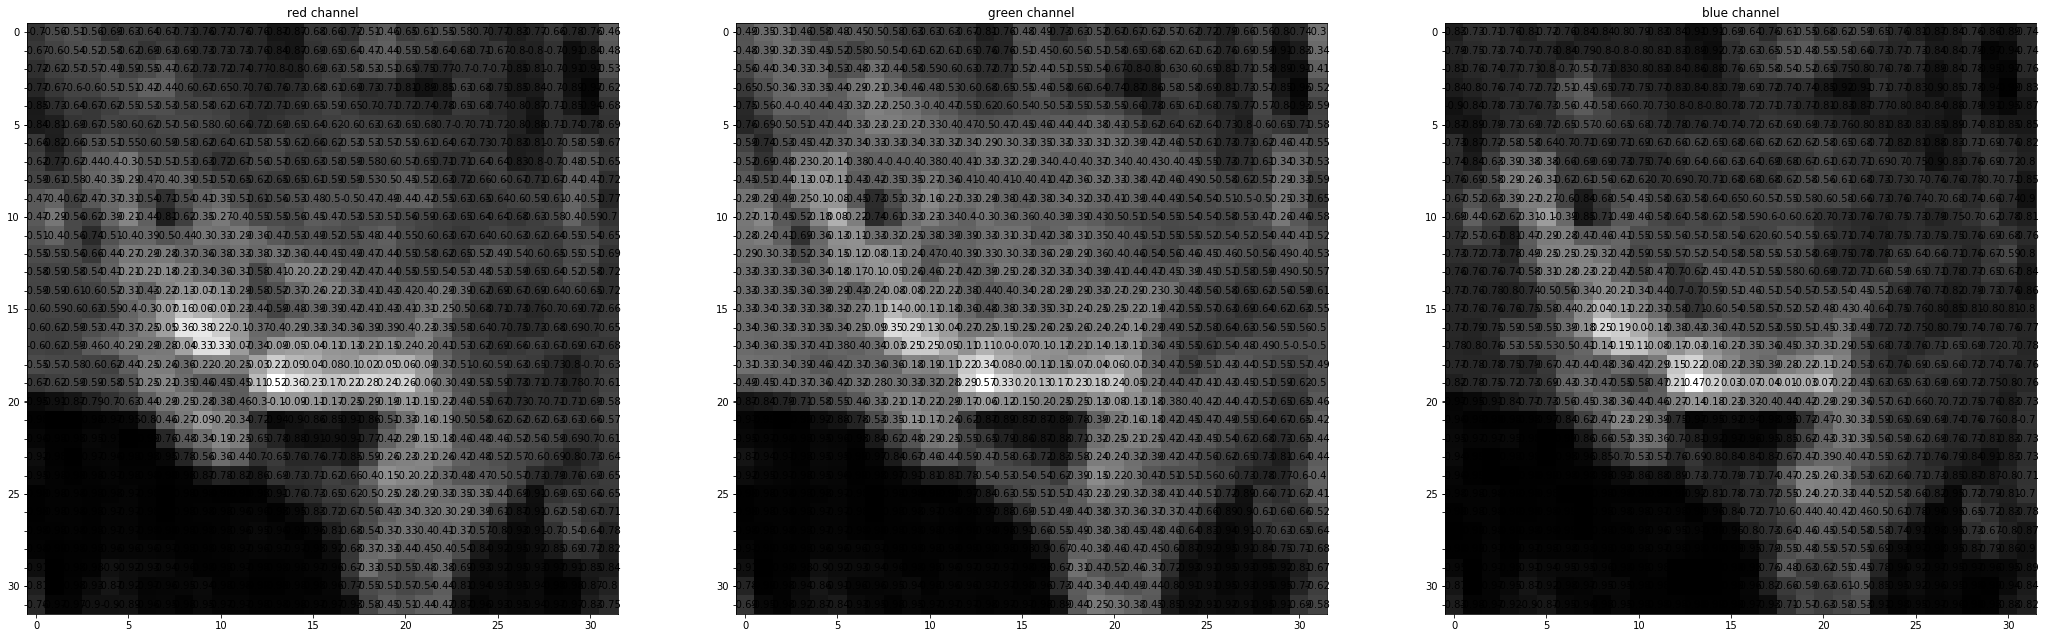

In [101]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36))
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx +1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] != 0 else 0
            ax.annotate(str(val), xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center', size=10)

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
# define the CNN architecture
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        
        return x

In [31]:
# create a complete CNN
model = Network()
print(model)

Network(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [32]:
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

####  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

In [35]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

---
## Train the Network

In [36]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss
        valid_loss += loss.item()*data.size(0)
        
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = train_loss/len(valid_loader.sampler)    
    
    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'cifar10_cnn_model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.115613 	Validation Loss: 0.000212
Validation loss decreased (inf --> 0.000212).  Saving model ...
Epoch: 2 	Training Loss: 1.704054 	Validation Loss: 0.000170
Validation loss decreased (0.000212 --> 0.000170).  Saving model ...
Epoch: 3 	Training Loss: 1.521736 	Validation Loss: 0.000152
Validation loss decreased (0.000170 --> 0.000152).  Saving model ...
Epoch: 4 	Training Loss: 1.426937 	Validation Loss: 0.000143
Validation loss decreased (0.000152 --> 0.000143).  Saving model ...
Epoch: 5 	Training Loss: 1.349700 	Validation Loss: 0.000135
Validation loss decreased (0.000143 --> 0.000135).  Saving model ...
Epoch: 6 	Training Loss: 1.279952 	Validation Loss: 0.000128
Validation loss decreased (0.000135 --> 0.000128).  Saving model ...
Epoch: 7 	Training Loss: 1.220044 	Validation Loss: 0.000122
Validation loss decreased (0.000128 --> 0.000122).  Saving model ...
Epoch: 8 	Training Loss: 1.160982 	Validation Loss: 0.000116
Validation loss decreased (0.00012

####  Load the Model with the Lowest Validation Loss

In [38]:
model.load_state_dict(torch.load('cifar10_cnn_model.pt'))

<All keys matched successfully>

---
## Test the Trained Network

In [39]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.709738

Test Accuracy of airplane: 78% (786/1000)
Test Accuracy of automobile: 88% (888/1000)
Test Accuracy of  bird: 63% (638/1000)
Test Accuracy of   cat: 49% (493/1000)
Test Accuracy of  deer: 73% (732/1000)
Test Accuracy of   dog: 66% (667/1000)
Test Accuracy of  frog: 83% (836/1000)
Test Accuracy of horse: 85% (853/1000)
Test Accuracy of  ship: 86% (868/1000)
Test Accuracy of truck: 81% (818/1000)

Test Accuracy (Overall): 75% (7579/10000)


#### Visualize Sample Test Results

In [49]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()
    
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

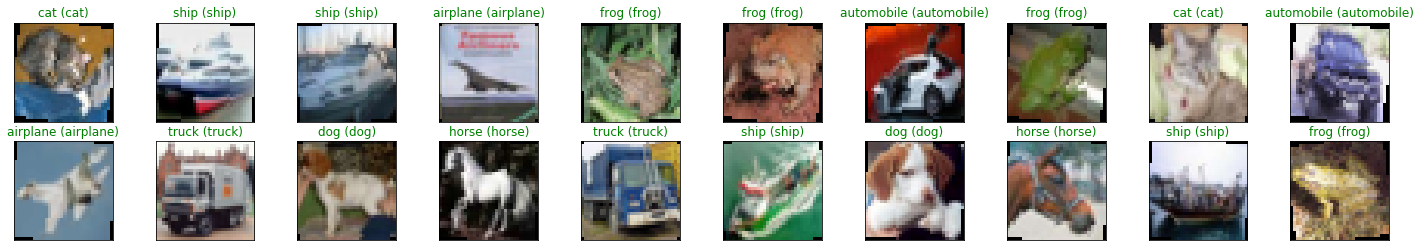

In [54]:
# move model inputs to cpu for the sake of visualization
images = images.cpu()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

<hr/>